In [ ]:
import pandas as pd
import json

with open("./t20s_json_file.json", "r") as file:
    data = json.load(file)

all_rows = []

# Loop through the data structure
for match in data:  # Iterate over all matches
    # Extract match-level data
    match_event = match.get("info", {}).get("event", {}).get("name", None)
    match_outcome = match.get("info", {}).get("outcome", {})
    match_winner = match_outcome.get("winner", None)
    player_of_match = ", ".join(match.get("info", {}).get("player_of_match", []))
    match_season = match.get("info", {}).get("season", None)
    toss_decision = match.get("info", {}).get("toss", {}).get("decision", None)
    toss_winner = match.get("info", {}).get("toss", {}).get("winner", None)
    venue = match.get("info", {}).get("venue", None)
    
    # Extract innings and deliveries data
    innings = match.get("innings", [])  # Get the innings list
    
    for inning in innings:  # Iterate over each inning
        team_name = inning.get("team")  # Extract team name
        overs = inning.get("overs", [])  # Get overs for the team
        
        for over_data in overs:  # Iterate through each over
            over_number = over_data.get("over")  # Extract the over number
            deliveries = over_data.get("deliveries", [])  # Extract deliveries
            
            for delivery in deliveries:  # Flatten each delivery
                # Check for wickets and extract `player_out` if present
                player_out = "None"  # Default value if no wickets are present
                if "wickets" in delivery:
                    wickets = delivery.get("wickets", [])
                    # Extract player_out for each wicket
                    player_outs = [wicket.get("player_out", "None") for wicket in wickets]
                    player_out = ", ".join(player_outs) if player_outs else "None"
                
                # Add all data into the row
                row = {
                    "Match Event": match_event,
                    "Match Winner": match_winner,
                    "Player of Match": player_of_match,
                    "Season": match_season,
                    "Toss Decision": toss_decision,
                    "Toss Winner": toss_winner,
                    "Venue": venue,
                    "Team": team_name,
                    "Over": over_number,
                    "Batter": delivery.get("batter"),
                    "Bowler": delivery.get("bowler"),
                    "Non-Striker": delivery.get("non_striker"),
                    "Batter Runs": delivery["runs"].get("batter", 0),
                    "Extras Runs": delivery["runs"].get("extras", 0),
                    "Total Runs": delivery["runs"].get("total", 0),
                    "Player Out": player_out  # Add player_out to the row
                }
                all_rows.append(row)

# Create a DataFrame from the collected rows
df = pd.DataFrame(all_rows)

# Save the DataFrame to a CSV file
df.to_csv("T20s_data.csv", index=False)

# Display the DataFrame
print(df)


In [2]:
import pandas as pd

T20_data = pd.read_csv("T20s_data.csv")
T20_data.head()

C:\Users\MANAV\AppData\Local\Temp\ipykernel_22344\1463977352.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  T20_data = pd.read_csv("T20s_data.csv")


,Match Event,Match Winner,Player of Match,Season,Toss Decision,Toss Winner,Venue,Team,Over,Batter,Bowler,Non-Striker,Batter Runs,Extras Runs,Total Runs,Player Out
0,NaN,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,0,1,1,NaN
1,NaN,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,0,1,1,NaN
2,NaN,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,0,0,0,NaN
3,NaN,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,1,0,1,NaN
4,NaN,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,1,0,1,NaN


In [8]:
T20_data = T20_data.rename(columns={
    'Match Event' : 'Match_Event',
    'Match Winner' : 'Match_Winner',
    'Player of Match' : 'Player_of_Match',
    'Toss Decision' : 'Toss_Decision',
    'Toss Winner' : 'Toss_Winner',
    'Non-Striker' : 'Non_Striker',
    'Batter Runs' : 'Batter_Runs',
    'Extras Runs' : 'Extras_Runs',
    'Total Runs' : 'Total_Runs',
    'Player Out' : 'Player_Out'
})

In [6]:
T20_data = T20_data.drop(columns=["Match_Event"])

In [9]:
T20_data.head(10)

,Match_Winner,Player_of_Match,Season,Toss_Decision,Toss_Winner,Venue,Team,Over,Batter,Bowler,Non_Striker,Batter_Runs,Extras_Runs,Total_Runs,Player_Out
0,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,0,1,1,NaN
1,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,0,1,1,NaN
2,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,0,0,0,NaN
3,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,1,0,1,NaN
4,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,1,0,1,NaN
5,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,6,0,6,NaN
6,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,0,0,0,MJ Clarke
7,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,0,0,0,NaN
8,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,4,0,4,NaN
9,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,6,0,6,NaN


In [10]:
T20_data.drop_duplicates(inplace=True)

In [11]:
T20_data.head(10)

,Match_Winner,Player_of_Match,Season,Toss_Decision,Toss_Winner,Venue,Team,Over,Batter,Bowler,Non_Striker,Batter_Runs,Extras_Runs,Total_Runs,Player_Out
0,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,0,1,1,NaN
2,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,0,0,0,NaN
3,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,1,0,1,NaN
4,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,AC Gilchrist,DR Tuffey,MJ Clarke,1,0,1,NaN
5,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,6,0,6,NaN
6,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,0,MJ Clarke,DR Tuffey,AC Gilchrist,0,0,0,MJ Clarke
7,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,0,0,0,NaN
8,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,4,0,4,NaN
9,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,6,0,6,NaN
10,Australia,RT Ponting,2004/05,bat,Australia,Eden Park,Australia,1,A Symonds,KD Mills,AC Gilchrist,1,0,1,NaN


In [12]:
T20_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630877 entries, 0 to 875069
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Match_Winner     618621 non-null  object
 1   Player_of_Match  574437 non-null  object
 2   Season           630877 non-null  object
 3   Toss_Decision    630877 non-null  object
 4   Toss_Winner      630877 non-null  object
 5   Venue            630877 non-null  object
 6   Team             630877 non-null  object
 7   Over             630877 non-null  int64 
 8   Batter           630877 non-null  object
 9   Bowler           630877 non-null  object
 10  Non_Striker      630877 non-null  object
 11  Batter_Runs      630877 non-null  int64 
 12  Extras_Runs      630877 non-null  int64 
 13  Total_Runs       630877 non-null  int64 
 14  Player_Out       48462 non-null   object
dtypes: int64(4), object(11)
memory usage: 77.0+ MB


In [13]:
T20_data["Season"].unique()

array(['2004/05', '2005', '2005/06', '2006', '2006/07', '2007', '2007/08',
       '2008', '2008/09', '2009', '2009/10', '2010', '2010/11', '2011',
       '2011/12', '2012', '2012/13', '2013', '2013/14', '2014', '2014/15',
       '2015', '2015/16', '2016', '2016/17', '2017', '2019', '2019/20',
       '2018/19', '2018', '2017/18', '2020', '2020/21', '2021', '2021/22',
       '2022', 2022, 2019, '2022/23', '2023', '2023/24', '2024', 2024,
       '2024/25'], dtype=object)

In [14]:
# Group by 'Team' and 'Batter', then sum the 'Batter Runs'
player_runs_by_team = T20_data.groupby(["Team", "Batter"])["Batter_Runs"].sum().reset_index()

# Rename the columns for better readability
player_runs_by_team.columns = ["Team", "Player", "Total_Runs"]

# Sort the DataFrame by 'Total Runs' in descending order and select the top 10 rows
top_10_batsmen = player_runs_by_team.sort_values(by="Total_Runs", ascending=False, ignore_index=True).head(10)

# Display the resulting DataFrame
print(top_10_batsmen)


          Team           Player  Total_Runs
0        India        RG Sharma        3256
1     Pakistan       Babar Azam        3249
2        India          V Kohli        3090
3  New Zealand       MJ Guptill        2902
4      England       JC Buttler        2672
5     Pakistan  Mohammad Rizwan        2643
6    Australia        DA Warner        2584
7        India       S Mandhana        2551
8    Australia         AJ Finch        2470
9  New Zealand         SW Bates        2381


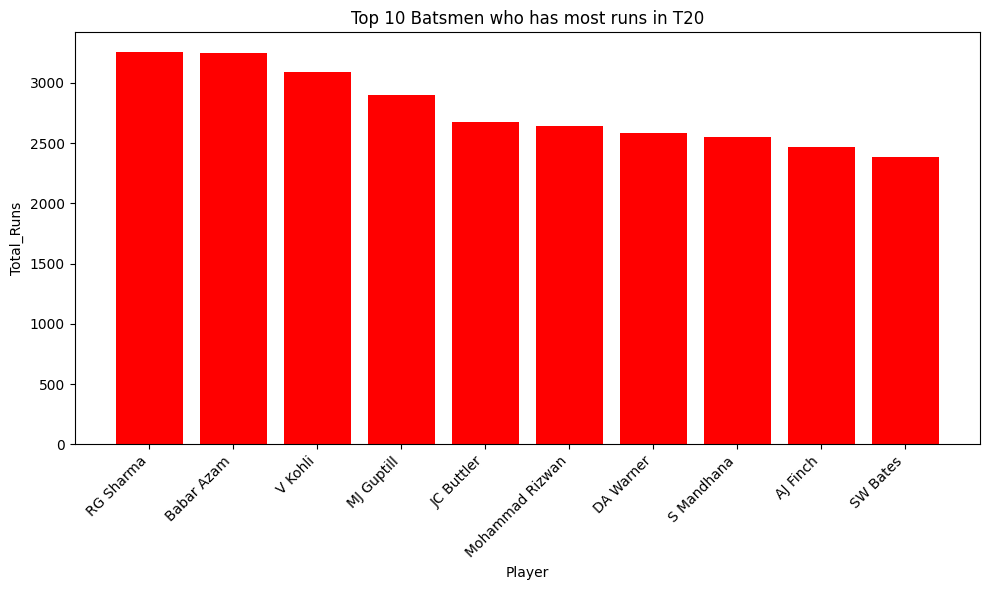

In [15]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_batsmen["Player"], top_10_batsmen["Total_Runs"], color='red')

# Adding labels and title
plt.xlabel("Player")
plt.ylabel("Total_Runs")
plt.title("Top 10 Batsmen who has most runs in T20")
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
# Filter the data for the season 2016/17
season_data = T20_data[T20_data["Season"] == "2022/23"]

# Group by 'Team' and 'Batter', then sum the 'Batter Runs'
player_runs_by_team = (
    season_data.groupby(["Season","Team", "Batter"])["Batter_Runs"].sum().reset_index())

# Sort by 'Batter Runs' in descending order to find the top batsmen
top_batsmen = player_runs_by_team.sort_values(by="Batter_Runs", ascending=False).head(10)

# Rename the columns for better readability
top_batsmen.columns = ["Season","Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(top_batsmen)


      Season         Team         Player  Total_Runs
334  2022/23        India       SA Yadav         609
73   2022/23      Bahrain   Sohail Ahmed         453
591  2022/23  New Zealand      DP Conway         435
85   2022/23   Bangladesh      Liton Das         420
330  2022/23        India     S Mandhana         403
203  2022/23      England     JC Buttler         369
309  2022/23        India         H Kaur         351
882  2022/23    Sri Lanka     BKG Mendis         341
18   2022/23    Australia      BL Mooney         338
337  2022/23        India  Shafali Verma         333


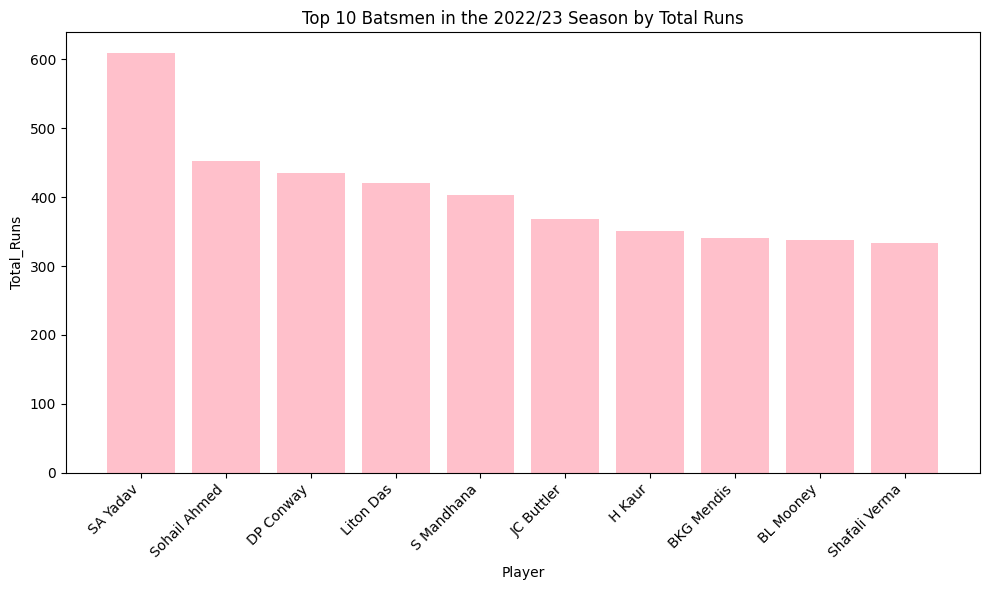

In [18]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_batsmen["Player"], top_batsmen["Total_Runs"], color='pink')

# Adding labels and title
plt.xlabel("Player")
plt.ylabel("Total_Runs")
plt.title("Top 10 Batsmen in the 2022/23 Season by Total Runs")
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


       Season                  Team           Player  Total_Runs
1347  2022/23                 India         SA Yadav         609
687   2021/22              Pakistan  Mohammad Rizwan         483
1002  2021/22           West Indies         N Pooran         466
1086  2022/23               Bahrain     Sohail Ahmed         453
1604  2022/23           New Zealand        DP Conway         435
1098  2022/23            Bangladesh        Liton Das         420
574   2021/22                 Nepal         DS Airee         418
882   2021/22             Sri Lanka       P Nissanka         405
1343  2022/23                 India       S Mandhana         403
960   2021/22  United Arab Emirates  Waseem Muhammad         381


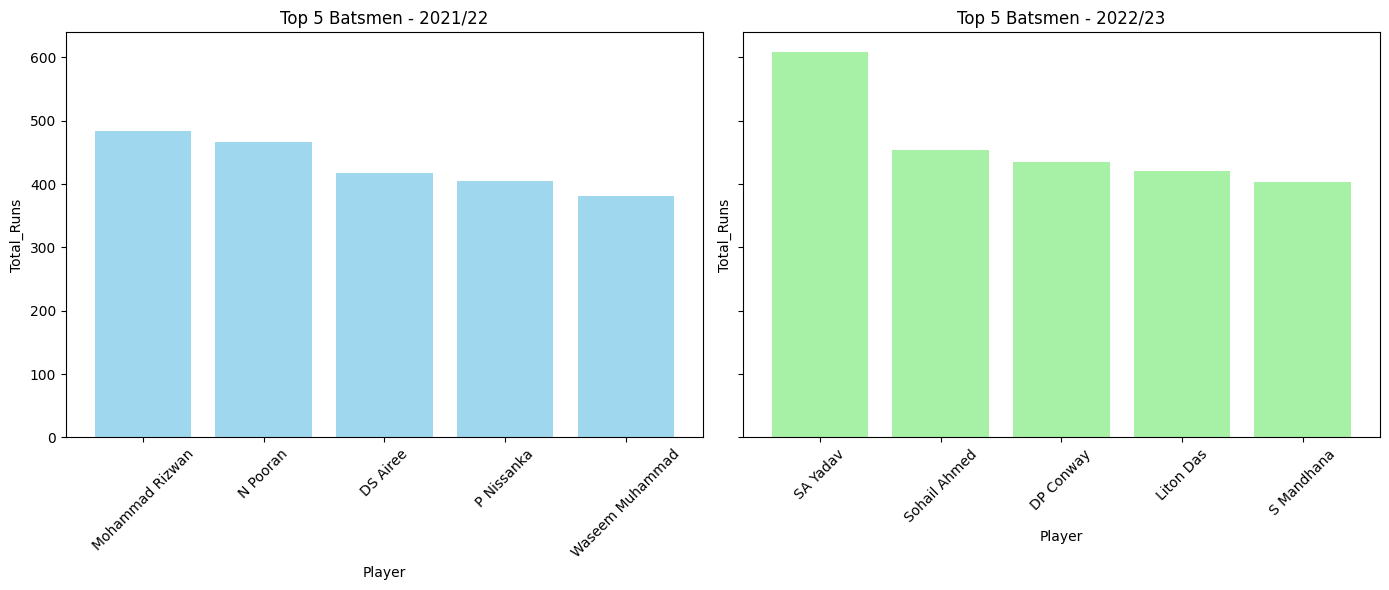

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the seasons 2022/23 and 2023/24
seasons_data = T20_data[T20_data["Season"].isin(["2021/22","2022/23"])]

# Group by 'Season', 'Team', and 'Batter', then sum the 'Batter Runs'
player_runs_by_season = (
    seasons_data.groupby(["Season", "Team", "Batter"])["Batter_Runs"]
    .sum()
    .reset_index()
)

# Sort by 'Batter Runs' in descending order to find the top batsmen for each season
top_batsmen = (
    player_runs_by_season.sort_values(by="Batter_Runs", ascending=False)
    .groupby("Season")
    .head(5)
)

# Rename the columns for better readability
top_batsmen.columns = ["Season", "Team", "Player", "Total_Runs"]

# Display the resulting DataFrame
print(top_batsmen)

# Define colors for each season
colors = {
    "2021/22": "skyblue",
    "2022/23": "lightgreen",
}

# Create separate plots for each season
seasons = ["2021/22","2022/23"]
fig, axes = plt.subplots(1, len(seasons), figsize=(14, 6), sharey=True)

for ax, season in zip(axes, seasons):
    season_data = top_batsmen[top_batsmen["Season"] == season]
    ax.bar(
        season_data["Player"],
        season_data["Total_Runs"],
        color=colors[season],
        alpha=0.8,
    )
    ax.set_title(f"Top 5 Batsmen - {season}")
    ax.set_xlabel("Player")
    ax.set_ylabel("Total_Runs")
    ax.set_xticks(range(len(season_data["Player"])))
    ax.set_xticklabels(season_data["Player"], rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Top 5 bowlers in the 2022/23 season with the most wickets:
Bowler
DB Sharma         36
YM Nkanya         34
Arshdeep Singh    29
Rizwan Butt       24
Nashra Sandhu     22
Name: count, dtype: int64


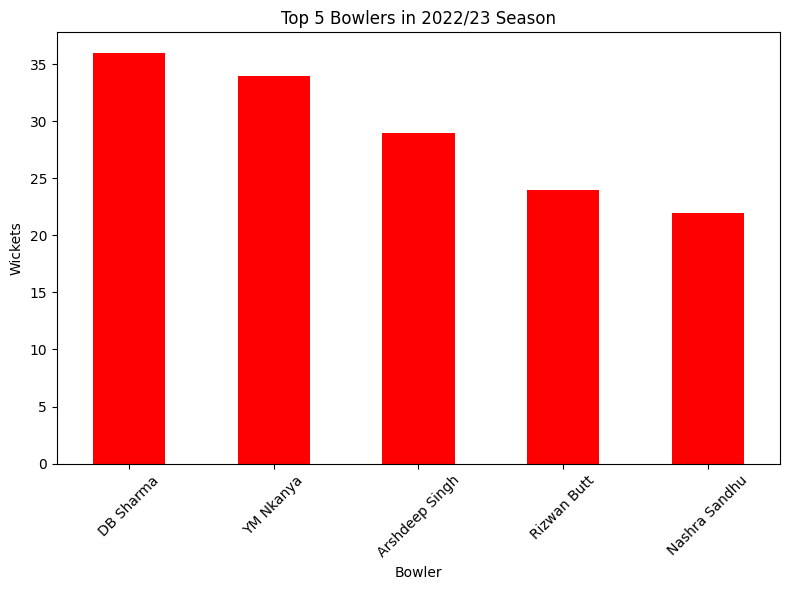

In [20]:
import pandas as pd

# Filter data for the 2016/17 season
season_data = T20_data[T20_data["Season"] == "2022/23"]

# Filter rows where "Bowler" has a value and "Player Out" is not NaN
valid_wickets = season_data[season_data["Player_Out"].notna()]

# Count the number of times each bowler appears in valid rows
bowler_wickets = valid_wickets["Bowler"].value_counts()

# Get the top 5 bowlers
top_5_bowlers = bowler_wickets.head(5)

print("Top 5 bowlers in the 2022/23 season with the most wickets:")
print(top_5_bowlers)

# Plot the top 5 bowlers
top_5_bowlers.plot(kind='bar', figsize=(8, 6), color='Red')
plt.title("Top 5 Bowlers in 2022/23 Season")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


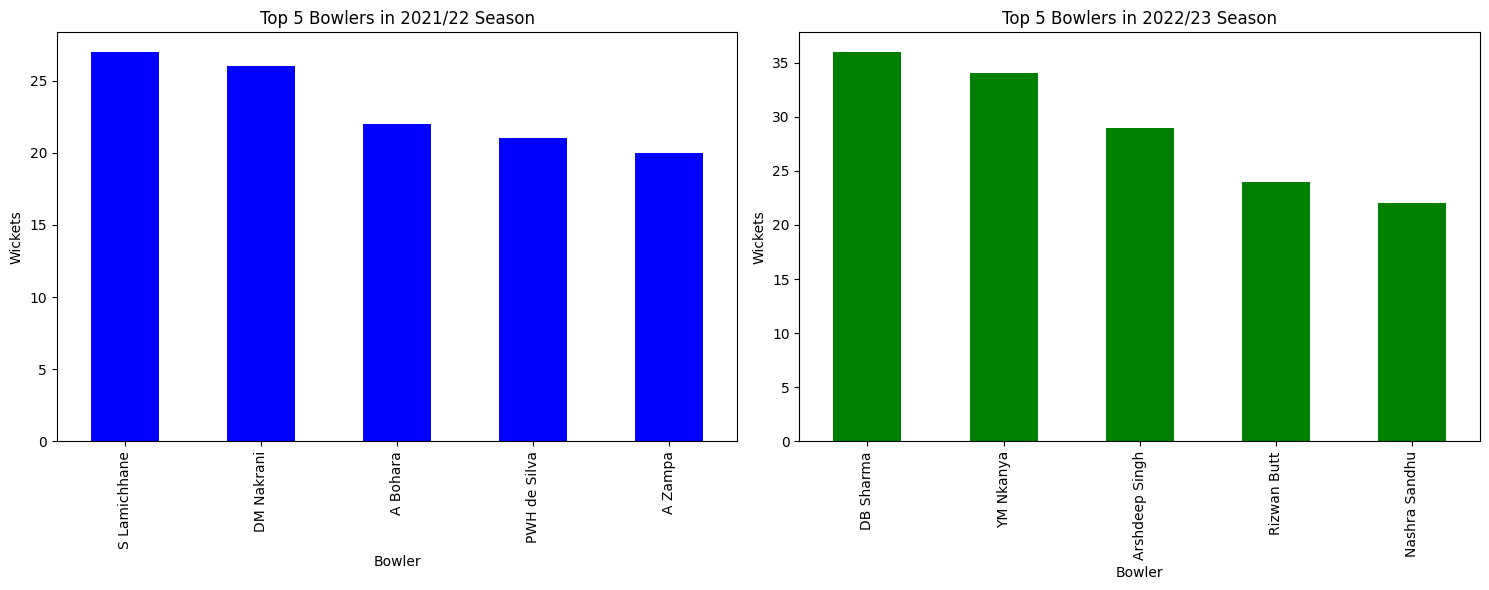

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2016/17 and 2018/19 seasons
season_2021_22 = T20_data[T20_data['Season'] == '2021/22']
season_2022_23 = T20_data[T20_data['Season'] == '2022/23']

# Function to find top 5 bowlers based on highest wickets
def top_bowlers(season_data):
    # Filter rows where the bowler has taken a wicket
    wickets_data = season_data.dropna(subset=['Player_Out', 'Bowler'])
    
    # Count wickets taken by each bowler
    bowler_wickets = wickets_data.groupby('Bowler').size().sort_values(ascending=False).head(5)
    
    return bowler_wickets

# Get the top 5 bowlers for both seasons
top_bowlers_2021_22 = top_bowlers(season_2021_22)
top_bowlers_2022_23 = top_bowlers(season_2022_23)

# Create subplots to show the graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 2021/22 season
top_bowlers_2021_22.plot(kind='bar', ax=axes[0], color='blue', title='Top 5 Bowlers in 2021/22 Season')
axes[0].set_xlabel('Bowler')
axes[0].set_ylabel('Wickets')

# Plot for 2022/23 season
top_bowlers_2022_23.plot(kind='bar', ax=axes[1], color='green', title='Top 5 Bowlers in 2022/23 Season')
axes[1].set_xlabel('Bowler')
axes[1].set_ylabel('Wickets')

# Show the plots
plt.tight_layout()
plt.show()


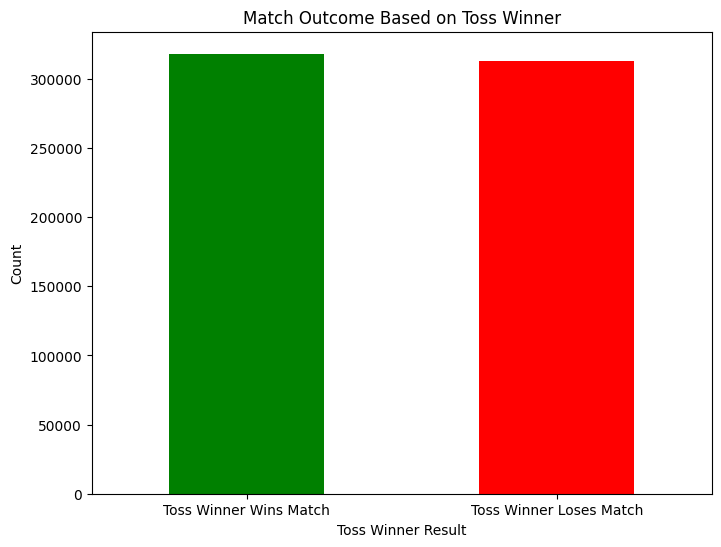

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into T20_data
# Create a new column to indicate if the toss winner is also the match winner
T20_data['Toss_Match_Winner'] = T20_data['Toss_Winner'] == T20_data['Match_Winner']

# Plotting the comparison
toss_match_winner_counts = T20_data['Toss_Match_Winner'].value_counts()

# Bar chart to show the number of times toss winner wins or loses the match
plt.figure(figsize=(8, 6))
toss_match_winner_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Match Outcome Based on Toss Winner')
plt.xlabel('Toss Winner Result')
plt.ylabel('Count')
plt.xticks([0, 1], ['Toss Winner Wins Match', 'Toss Winner Loses Match'], rotation=0)
plt.show()

In [30]:
T20_data.isnull().sum()

Match_Winner       0
Player_of_Match    0
Season             0
Toss_Decision      0
Toss_Winner        0
Venue              0
Team               0
Over               0
Batter             0
Bowler             0
Non_Striker        0
Batter_Runs        0
Extras_Runs        0
Total_Runs         0
Player_Out         0
dtype: int64

In [25]:
T20_data = T20_data.drop(columns=["Toss_Match_Winner"])

In [27]:
# Replace None or NaN values in 'Player Out' column with 0
T20_data['Player_Out'] = T20_data['Player_Out'].fillna(0)

# Verify the replacement
print(T20_data['Player_Out'].head())

0    0
2    0
3    0
4    0
5    0
Name: Player_Out, dtype: object


In [28]:
# Replace None or NaN values in 'Player of Match' column with 0
T20_data['Player_of_Match'] = T20_data['Player_of_Match'].fillna(0)

# Verify the replacement
print(T20_data['Player_of_Match'].head())

0    RT Ponting
2    RT Ponting
3    RT Ponting
4    RT Ponting
5    RT Ponting
Name: Player_of_Match, dtype: object


In [29]:
# Replace None or NaN values in 'Match Winner' column with 0
T20_data['Match_Winner'] = T20_data['Match_Winner'].fillna(0)

# Verify the replacement
print(T20_data['Match_Winner'].head())

0    Australia
2    Australia
3    Australia
4    Australia
5    Australia
Name: Match_Winner, dtype: object


In [61]:
T20_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630877 entries, 0 to 875069
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Match Winner     630877 non-null  object
 1   Player of Match  630877 non-null  object
 2   Season           630877 non-null  object
 3   Toss Decision    630877 non-null  object
 4   Toss Winner      630877 non-null  object
 5   Venue            630877 non-null  object
 6   Team             630877 non-null  object
 7   Over             630877 non-null  int64 
 8   Batter           630877 non-null  object
 9   Bowler           630877 non-null  object
 10  Non-Striker      630877 non-null  object
 11  Batter Runs      630877 non-null  int64 
 12  Extras Runs      630877 non-null  int64 
 13  Total Runs       630877 non-null  int64 
 14  Player Out       630877 non-null  object
dtypes: int64(4), object(11)
memory usage: 77.0+ MB


In [31]:
T20_data.to_csv("T20s_data_final.csv")